# Logistic Regression Model with Python

I am building a Logistic Regression Model which will tell a Telecom company whether a customer will churn or not based on various attributes of the customer

#### Let's get started

### First let's import all the necessary Python Libraries

In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix 
from imblearn.over_sampling import SMOTE

%matplotlib inline

### Let's check the Data

Our whole Dataset is divided into 3 CSV files , so what I am going to do is import them in 3 separate dataframes and then combine all the 3 into a single DataFrame

In [489]:
df1=pd.read_csv('customer_data.csv')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [415]:
df2=pd.read_csv('churn_data.csv')
df2.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [416]:
df3=pd.read_csv('internet_data.csv')
df3.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Wait! Before Concatenating them , first let's check the number of rows of all the files. It should be same for performing join

In [490]:
[df1.shape,df2.shape,df3.shape]

[(7043, 5), (7043, 9), (7043, 9)]

So, all the files have same number of rows , let's merge them into a single dataframe

In [518]:
df=pd.concat([df1,df2,df3],axis=1)

In [242]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,customerID,tenure,PhoneService,Contract,PaperlessBilling,...,Churn,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,7590-VHVEG,1,No,Month-to-month,Yes,...,No,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,5575-GNVDE,34,Yes,One year,No,...,No,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,3668-QPYBK,2,Yes,Month-to-month,Yes,...,Yes,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,7795-CFOCW,45,No,One year,No,...,No,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,9237-HQITU,2,Yes,Month-to-month,Yes,...,Yes,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [243]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')

#### Oh No! Now we have 3 duplicates of "customerID" in our dataframe, So let's remove it.

In [519]:
df = df.loc[:,~df.columns.duplicated()]

In [294]:
df.head(492)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,...,29.85,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,One year,No,Mailed check,...,1889.5,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,...,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),...,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,...,151.65,Yes,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,3649-JPUGY,Male,0,No,No,72,Yes,Two year,Yes,Bank transfer (automatic),...,6201.95,No,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes
488,4472-LVYGI,Female,0,Yes,Yes,0,No,Two year,Yes,Bank transfer (automatic),...,,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No
489,8372-JUXUI,Male,0,No,Yes,1,Yes,Month-to-month,Yes,Electronic check,...,74.35,Yes,Yes,Fiber optic,No,No,No,No,No,No
490,3552-CTCYF,Male,0,Yes,Yes,63,Yes,Two year,Yes,Bank transfer (automatic),...,6597.25,No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes


In [246]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

### Okay! SO now here is the Final Data Set. 

#### Let's explore the Data

#### Input Variables-
|S.No| Variable Name | Meaning |
|---| --- | --- | 
|1| CustomerID | The unique ID of each customer |
|2| Gender   | The gender of a person |
|3| SeniorCitizen | Whether a customer can be classified as a senior citizen. |
|4| Partner    | If a customer is married/ in a live-in relationship. |
|5| Dependents | If a customer has dependents (children/ retired parents). |
|6| Tenure    | The time for which a customer has been using the service. |
|7| PhoneService | Whether a customer has a landline phone service along with the internet service. |
|8| MultipleLines | Whether a customer has multiple lines of internet connectivity. |
|9| InternetService | The type of internet services chosen by the customer. |
|10| OnlineSecurity | Specifies if a customer has online security. |
|11| OnlineBackup | Specifies if a customer has online backup. |
|12| DeviceProtection | Specifies if a customer has opted for device protection. |
|13| TechSupport | Whether a customer has opted for tech support of not. |
|14| StreamingTV | Whether a customer has an option of TV streaming. |
|15| StreamingMovies | Whether a customer has an option of Movie streaming. |
|16| Contract | The type of contract a customer has chosen. |
|17| PaperlessBilling | Whether a customer has opted for paperless billing. |
|18| PaymentMethod | Specifies the method by which bills are paid. |
|19| MonthlyCharges  | Specifies the money paid by a customer each month.|
|20| TotalCharges   | The total money paid by the customer to the company.|

#### Output Variable/ Target Variable-
|S.No| Variable Name | Meaning |
|---| --- | --- | 
|1| Churn | This is the target variable which specifies if a customer has churned or not. |

# Data Cleaning

First let's replace all the empty spaces with NaNs

In [520]:
empty_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in empty_cols:
    df[i]=df[i].replace(" ",np.nan)

Now let's check if there is any NaN value(s) present in any column(s) or not:

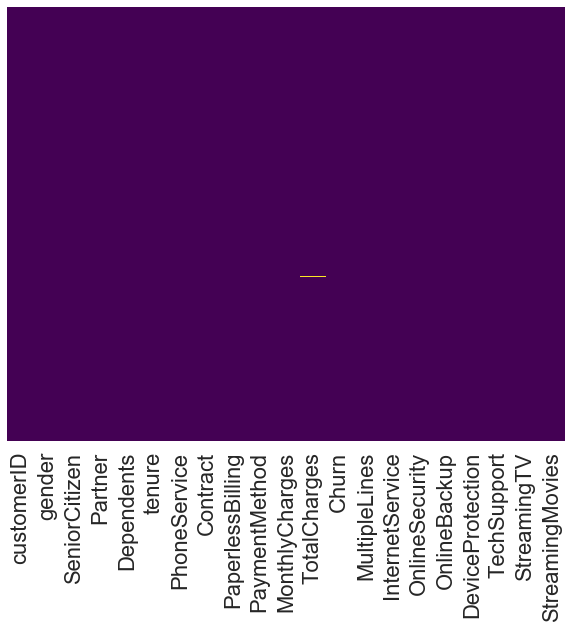

In [496]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [497]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

#### There are total 11 missing values in "TotalCharges" column

I am going to drop the rows with missing values

In [521]:
df=df.dropna()

In [499]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

#### Our Data is Clean now

# Exploratory Data Analysis (EDA)

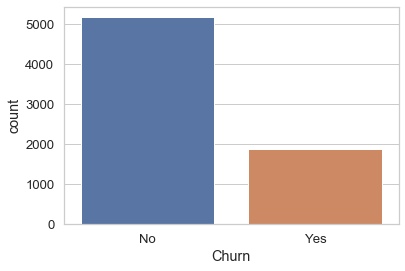

In [252]:
sns.countplot(x='Churn',data=df)

Checking the unique Data types-

In [253]:
for item in df.columns:
    print(item)
    print (df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet 

#### Let's check the relation between Categorical Features and our Target Variable

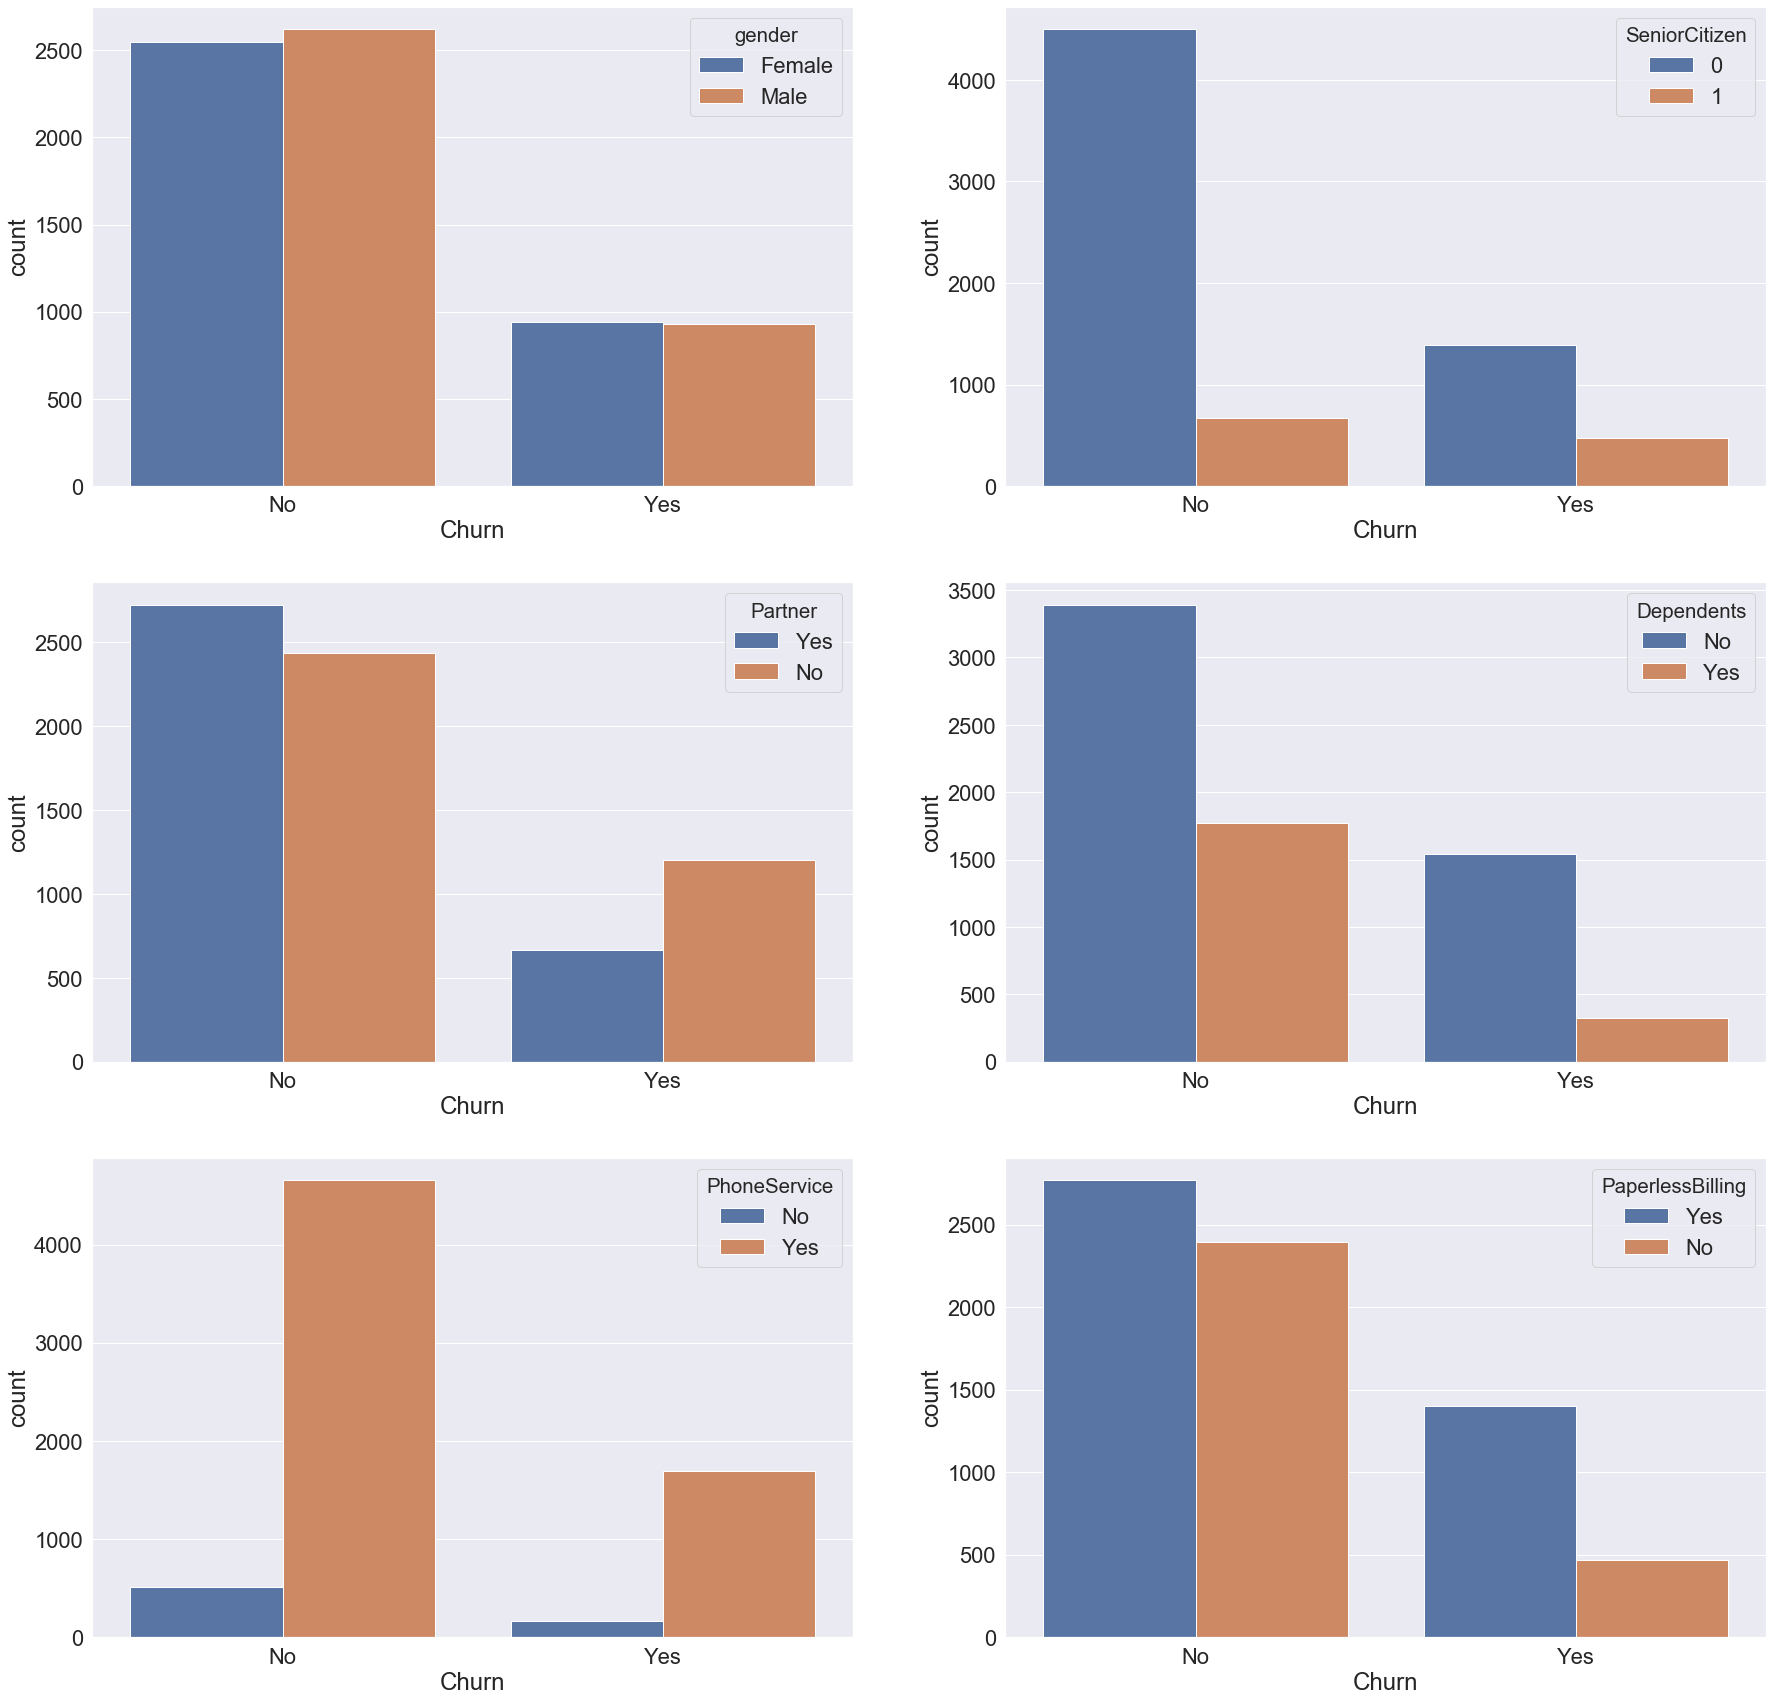

In [254]:
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
plt.subplot(3,2,1)
sns.countplot(x='Churn',hue='gender',data=df)

plt.subplot(3,2,2)
sns.countplot(x='Churn',hue='SeniorCitizen',data=df)

plt.subplot(3,2,3)
sns.countplot(x='Churn',hue='Partner',data=df)

plt.subplot(3,2,4)
sns.countplot(x='Churn',hue='Dependents',data=df)

plt.subplot(3,2,5)
sns.countplot(x='Churn',hue='PhoneService',data=df)
           
plt.subplot(3,2,6)
sns.countplot(x='Churn',hue='PaperlessBilling',data=df)


plt.show()

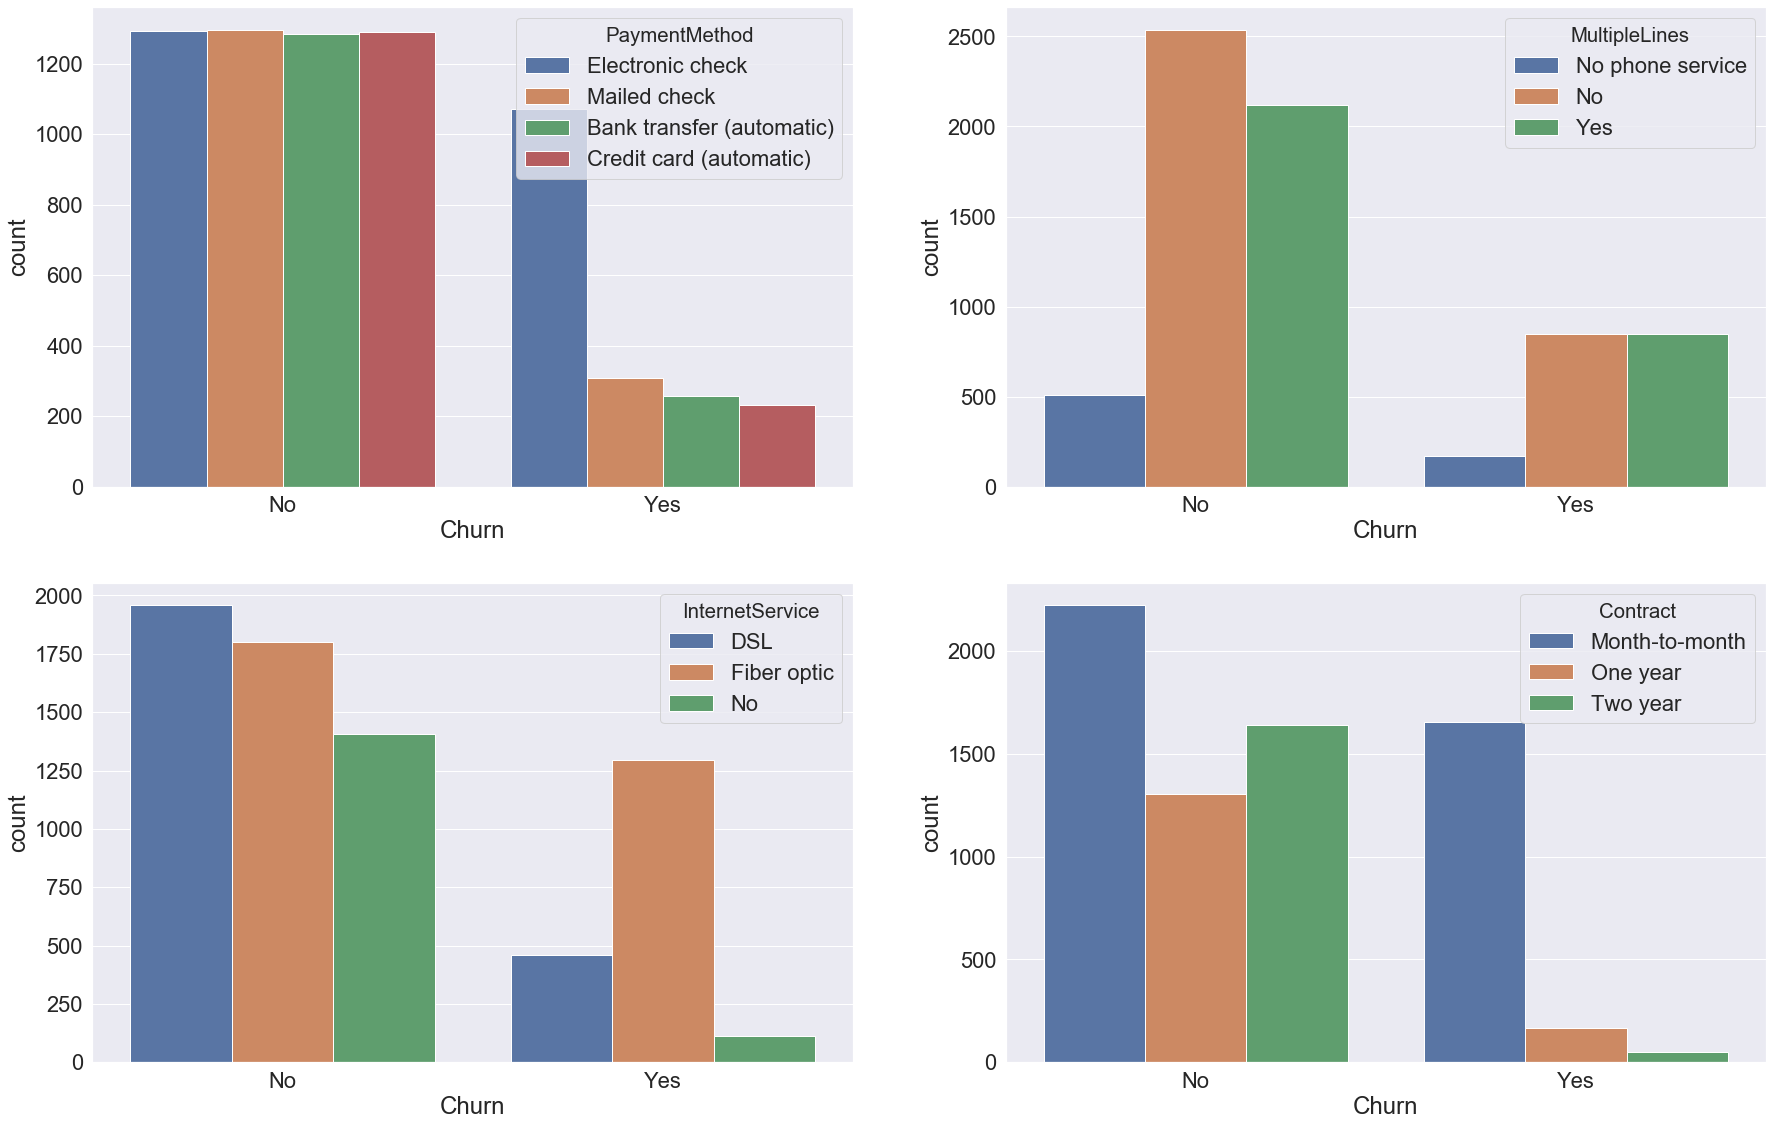

In [255]:
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
plt.subplot(3,2,1)
sns.countplot(x='Churn',hue='PaymentMethod',data=df)

plt.subplot(3,2,2)
sns.countplot(x='Churn',hue='MultipleLines',data=df)

plt.subplot(3,2,3)
sns.countplot(x='Churn',hue='InternetService',data=df)

plt.subplot(3,2,4)
sns.countplot(x='Churn',hue='Contract',data=df)

plt.show()

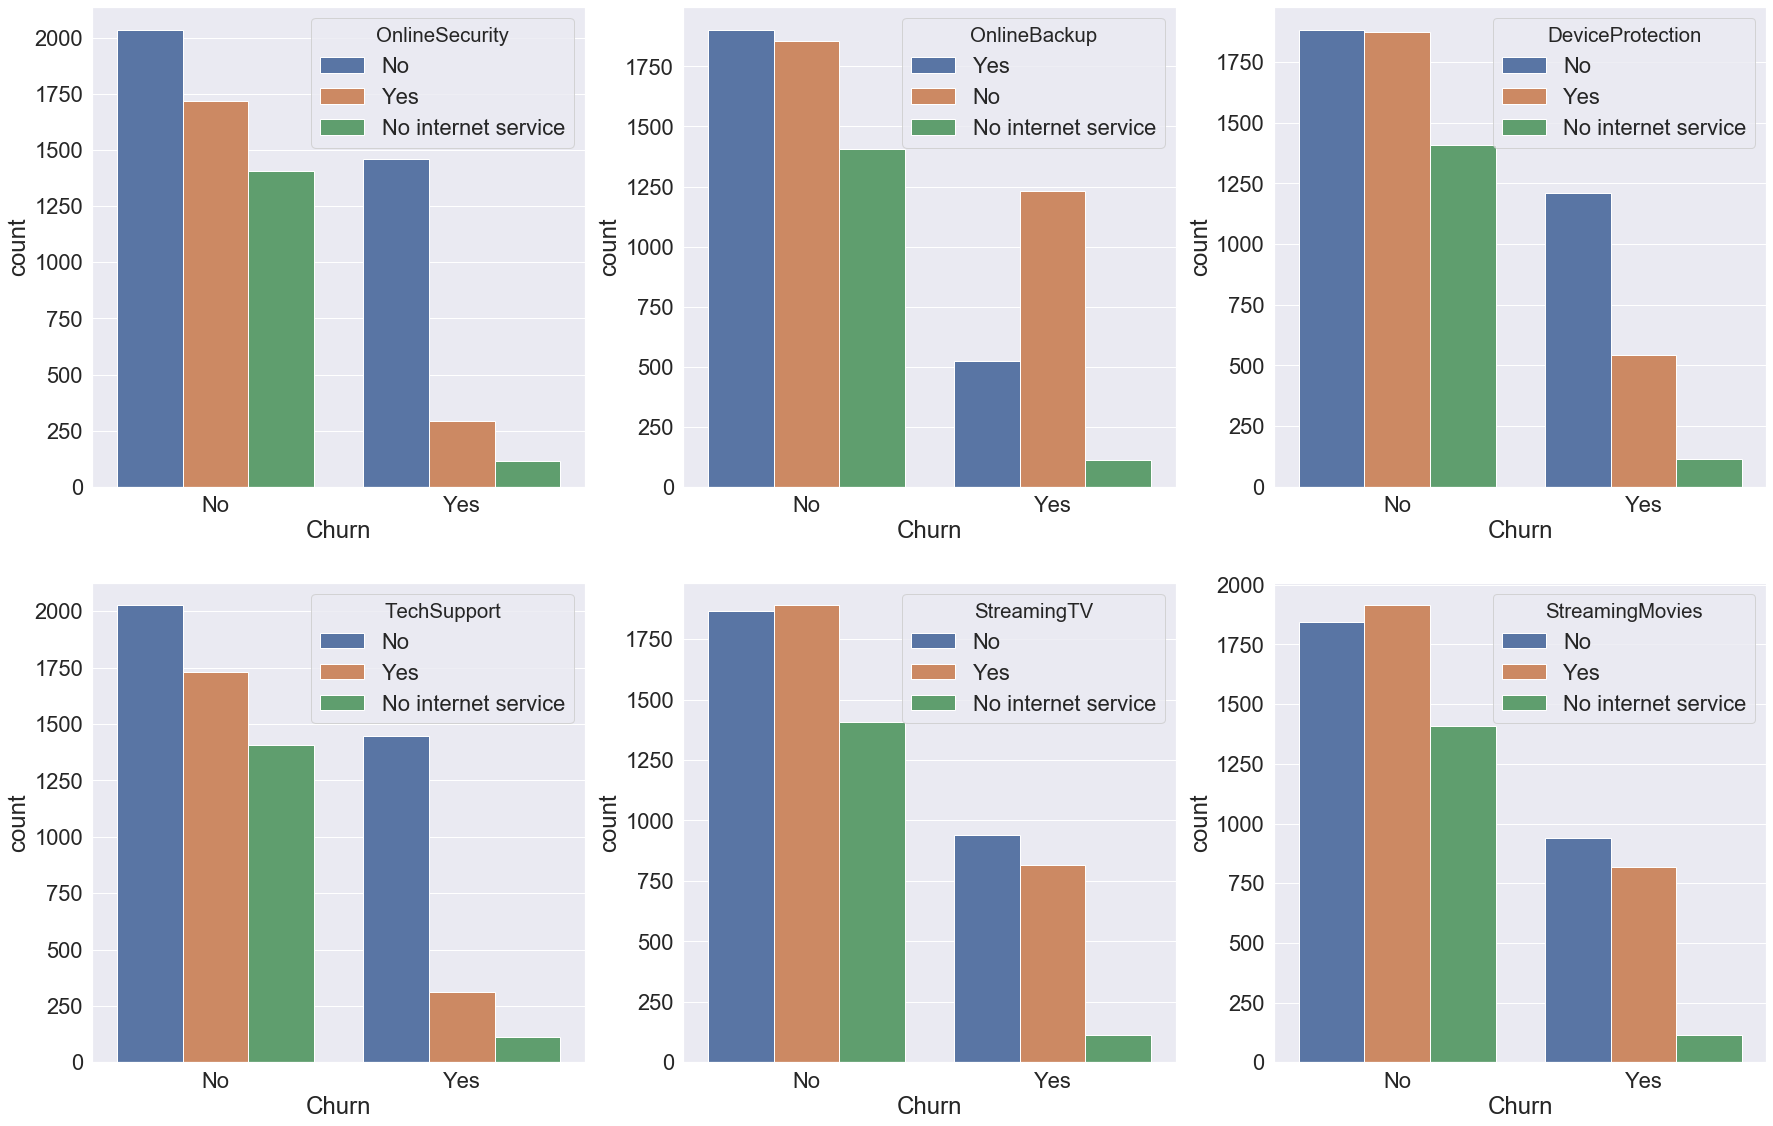

In [256]:
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
plt.subplot(3,3,1)
sns.countplot(x='Churn',hue='OnlineSecurity',data=df)

plt.subplot(3,3,2)
sns.countplot(x='Churn',hue='OnlineBackup',data=df)

plt.subplot(3,3,3)
sns.countplot(x='Churn',hue='DeviceProtection',data=df)

plt.subplot(3,3,4)
sns.countplot(x='Churn',hue='TechSupport',data=df)

plt.subplot(3,3,5)
sns.countplot(x='Churn',hue='StreamingTV',data=df)
           
plt.subplot(3,3,6)
sns.countplot(x='Churn',hue='StreamingMovies',data=df)


plt.show()

#### Let's check the churn rate for the categorical features

First let's convert the 'Churn' column to numeric type

In [522]:
binary_cols=['Churn']

for i in binary_cols:
    df[i]=df[i].replace({"Yes":1,"No":0})

In [393]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,...,29.85,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,One year,No,Mailed check,...,1889.5,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,...,108.15,1,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),...,1840.75,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,...,151.65,1,No,Fiber optic,No,No,No,No,No,No


In [259]:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269595
Male,0.262046


In [260]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236503
1,0.416813


In [261]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329761
Yes,0.197171


In [262]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.155312


In [263]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.250000
Yes,0.267475


In [264]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163757
Yes,0.335893


In [265]:
df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167315
Credit card (automatic),0.152531
Electronic check,0.452854
Mailed check,0.192020


In [266]:
df[['MultipleLines','Churn']].groupby(['MultipleLines']).mean()

,Churn
MultipleLines,
No,0.250812
No phone service,0.250000
Yes,0.286485


In [267]:
df[['InternetService','Churn']].groupby(['InternetService']).mean()

,Churn
InternetService,
DSL,0.189983
Fiber optic,0.418928
No,0.074342


In [268]:
df[['Contract','Churn']].groupby(['Contract']).mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


In [269]:
df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean()

,Churn
OnlineSecurity,
No,0.417787
No internet service,0.074342
Yes,0.146402


In [270]:
df[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean()

,Churn
OnlineBackup,
No,0.399417
No internet service,0.074342
Yes,0.215670


In [271]:
df[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean()

,Churn
DeviceProtection,
No,0.391403
No internet service,0.074342
Yes,0.225393


In [272]:
df[['TechSupport','Churn']].groupby(['TechSupport']).mean()

,Churn
TechSupport,
No,0.416475
No internet service,0.074342
Yes,0.151961


In [273]:
df[['StreamingTV','Churn']].groupby(['StreamingTV']).mean()

,Churn
StreamingTV,
No,0.335351
No internet service,0.074342
Yes,0.301147


In [274]:
df[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean()

,Churn
StreamingMovies,
No,0.337289
No internet service,0.074342
Yes,0.299524


## Conclusions from above plots and tables-
 * 'Gender' column hardly affects , whether a customer will churn or not.
 * A customer who is 'SeniorCitizen' is likely to not to churn .
 * A person who is 'married' or in a 'living-relation' is likely to not to churn.
 * A person who has 'dependents' is likely to not to churn.
 * 'PhoneService' column hardly affects , whether a customer will churn or not.
 * A person who has opted for the 'PaperlessBilling' is likely to churn.
 * A person who has done 'Electronic Check' for the payment is likely to churn.
 * 'MultipleLines' column hardly affects , whether a customer will churn or not.
 * A person whose 'InternetService' is 'Fibre Optic' is likely to churn.
 * A persong with 'Contract' -> 'Month-to-month' is likely to churn.
 * All internet service related features seem to have different churn rates for their classes because churn rate changes according to customers having these services. 

### Now we will check other Categorical Features which has continuous values

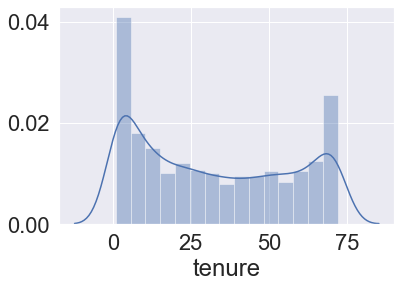

In [275]:
sns.distplot(df['tenure'])

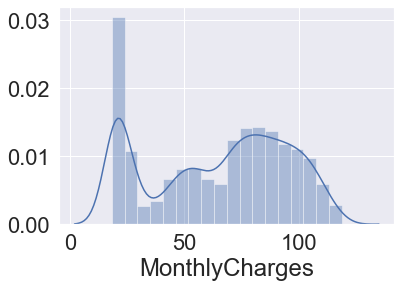

In [276]:
sns.distplot(df['MonthlyCharges'])

In [277]:
df[['MonthlyCharges','tenure','Churn']].groupby(['Churn']).mean()

,MonthlyCharges,tenure
Churn,,
0,61.307408,37.650010
1,74.441332,17.979133


* It can be seen that the customers with longer 'tenure' does not churn.
* 'MonthlyCharges' also affects the Churn rate.

### From the above plots and tables , it is sure that columns like - 'customerID' , 'gender' , 'PhoneService' , 'MultipleLines' & 'TotalCharges' will not help us in predicting the Target variable , so it is better to drop them to make our model comparitively less complex

In [523]:
df.drop(['customerID','gender','PhoneService','MultipleLines','TotalCharges'], axis=1, inplace=True)

In [430]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,Yes,No,1,Month-to-month,Yes,Electronic check,29.85,0,DSL,No,Yes,No,No,No,No
1,0,No,No,34,One year,No,Mailed check,56.95,0,DSL,Yes,No,Yes,No,No,No
2,0,No,No,2,Month-to-month,Yes,Mailed check,53.85,1,DSL,Yes,Yes,No,No,No,No
3,0,No,No,45,One year,No,Bank transfer (automatic),42.30,0,DSL,Yes,No,Yes,Yes,No,No
4,0,No,No,2,Month-to-month,Yes,Electronic check,70.70,1,Fiber optic,No,No,No,No,No,No


## Now let's change all the column into numeric types- Label Encoding

In [524]:
binary_cols=['Partner','Dependents','PaperlessBilling']

for i in binary_cols:
    df[i]=df[i].replace({"Yes":1,"No":0})

## Now let's create some dummy variables - One Hot Encoding

In [525]:
category_cols=['PaymentMethod','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']
for cc in category_cols:
    dummies = pd.get_dummies(df[cc], drop_first=False)
    dummies = dummies.add_prefix("{}_".format(cc))
    df.drop(cc, axis=1, inplace=True)
    df = df.join(dummies)

In [433]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,1,1,29.85,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,34,0,56.95,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,2,1,53.85,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,45,0,42.30,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,2,1,70.70,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [434]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'Churn', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PaperlessBilling                         7032 non-null   int64  
 5   MonthlyCharges                           7032 non-null   float64
 6   Churn                                    7032 non-null   int64  
 7   PaymentMethod_Bank transfer (automatic)  7032 non-null   uint8  
 8   PaymentMethod_Credit card (automatic)    7032 non-null   uint8  
 9   PaymentMethod_Electronic check           7032 non-null   uint8  
 10  PaymentMethod_Mailed check               7032 no

## Now let's check the correlation between variables using a heatmap

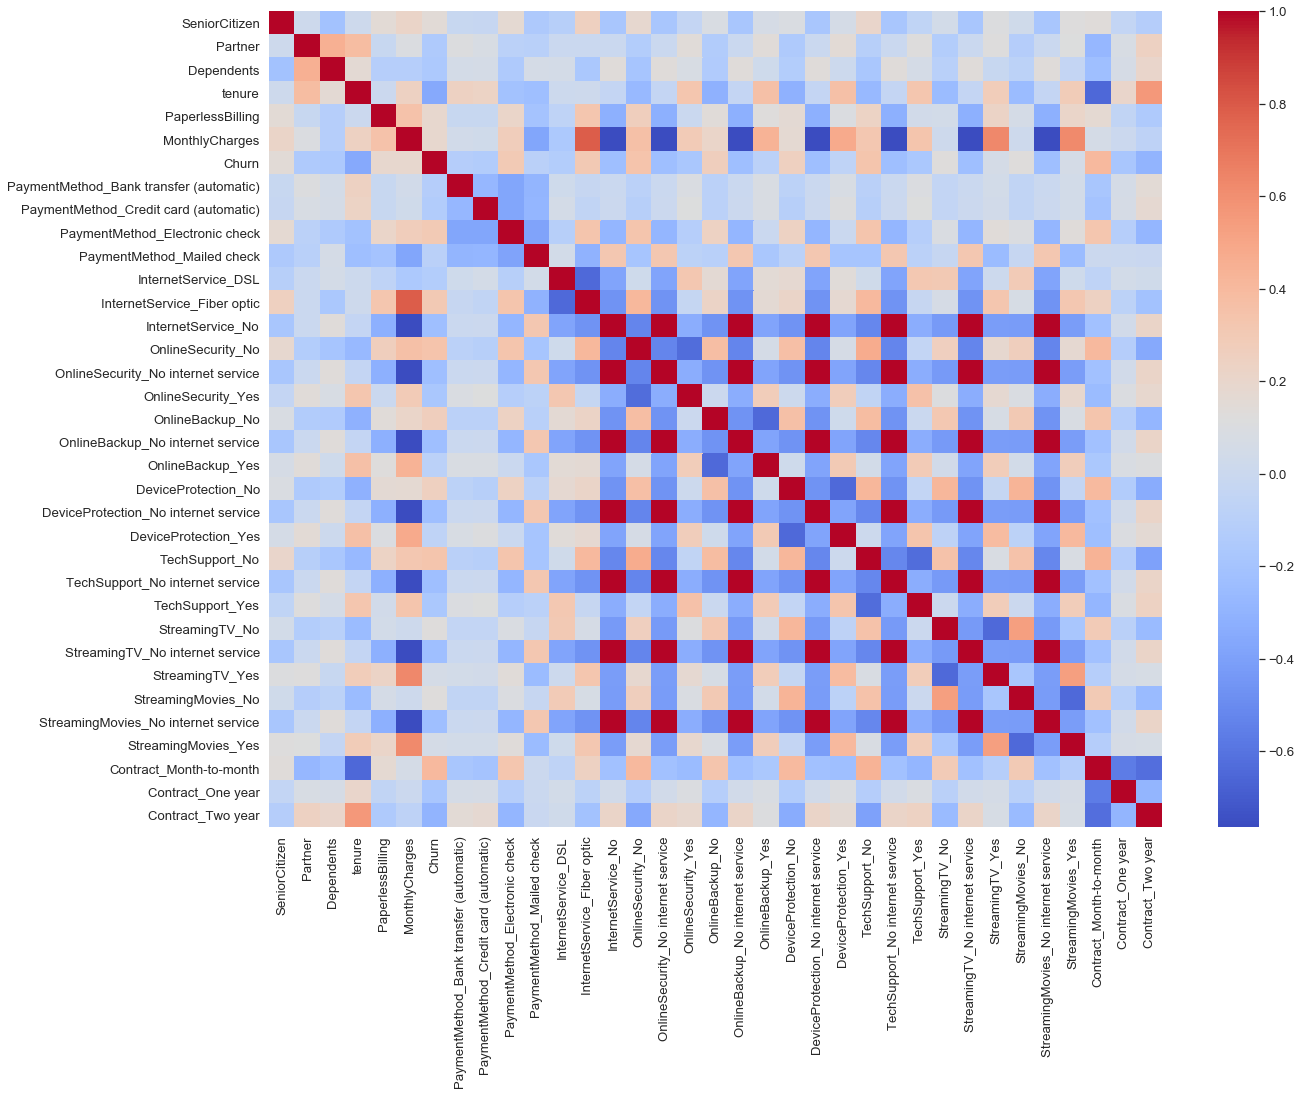

In [435]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

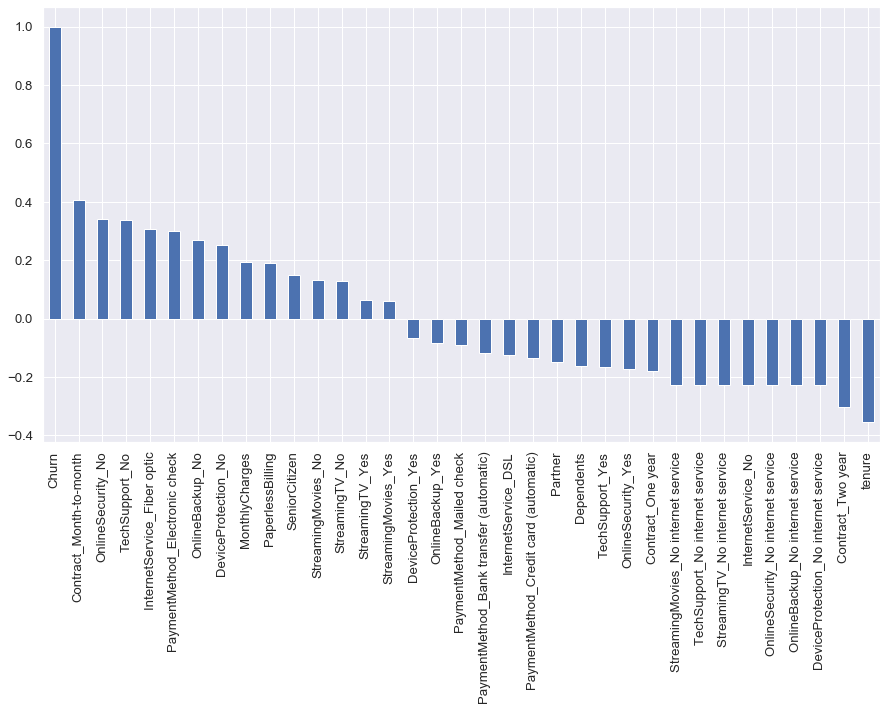

In [438]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.2)
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

So, it is obvious from the above plot that now our DataSet contains the variables which are correlated to the target variable

## One Last step is left i.e. to Scale the data , so let's do it

In [526]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
df['tenure'] = a
df['MonthlyCharges'] = b

# Here's our final Preprocessed Data Set

In [440]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,0.000000,1,0.115423,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0.464789,0,0.385075,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,0.014085,1,0.354229,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0.619718,0,0.239303,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0.014085,1,0.521891,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   float64
 4   PaperlessBilling                         7032 non-null   int64  
 5   MonthlyCharges                           7032 non-null   float64
 6   Churn                                    7032 non-null   int64  
 7   PaymentMethod_Bank transfer (automatic)  7032 non-null   uint8  
 8   PaymentMethod_Credit card (automatic)    7032 non-null   uint8  
 9   PaymentMethod_Electronic check           7032 non-null   uint8  
 10  PaymentMethod_Mailed check               7032 no

# Splitting of Data into training set and testing set

In [527]:
x = df.drop(['Churn'], axis=1) 
y = df['Churn'] 

In [528]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5625, 34)
Number transactions y_train dataset:  (5625,)
Number transactions X_test dataset:  (1407, 34)
Number transactions y_test dataset:  (1407,)


# Resampling the Data
I am going to balance the target variable with SMOTE (Synthetic Minority Oversampling Technique). With our training data created, I’ll up-sample minority sample( in our case the 'yes_churn' (customers who churn) sample using the SMOTE algorithm. At a high level, SMOTE:

* Works by creating synthetic samples from the minor class ( yes-churn) instead of creating copies.

* Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [531]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#### Now our is completely Balanced

# Now let's create and Train our model

# Logistic Regression Model

In [532]:
from sklearn.linear_model import LogisticRegression

In [533]:
logmodel = LogisticRegression()
logmodel.fit(X_train_res,y_train_res)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [534]:
predictions = logmodel.predict(X_test)

In [535]:
from sklearn.metrics import classification_report

In [536]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1038
           1       0.56      0.72      0.63       369

    accuracy                           0.78      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.78      0.78      1407



In [537]:
results = confusion_matrix(y_test, predictions) 

### Confusion Matrix

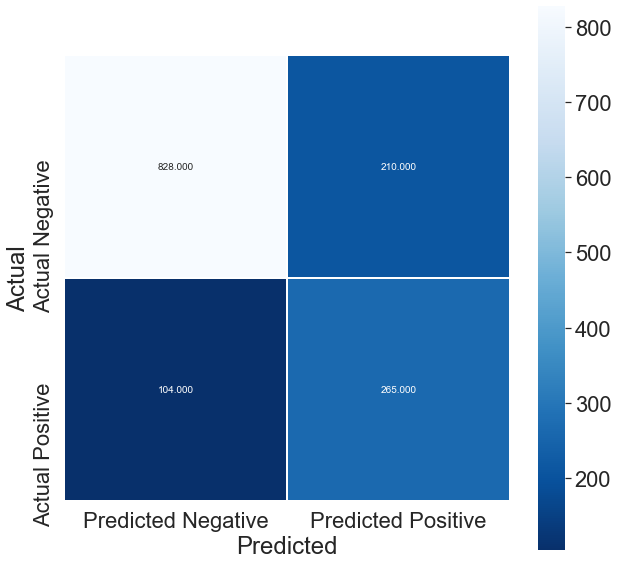

In [538]:
results_df = pd.DataFrame(results, columns = ['Predicted Negative', 'Predicted Positive'],index = ['Actual Negative', 'Actual Positive'])
plt.figure(figsize=(10,10))
sns.heatmap(results_df, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');

#### Developed By- Maninder Singh Bakshi